# Objetivo:

1)Mostre médias, medianas, modas e desvio padrão

2)Mostre números mínimos e máximos, de pelo menos duas variáveis, e suas amplitudes

3)Pelo menos dois gráficos de Barras (Sarah - ok)

4)Pelo menos dois gráficos de Linhas (Sarah - ok)

5)Pelo menos dois gráficos Blox Pot

6)Pelo menos dois gráficos de Correlação (Rafael - pendente)

Para cada item acima justifique as informações escolhidas e explique os resultados obtidos
(considerando os conceitos discutidos em sala de aula).



**Precisamos definir dados a serem analisados** <br />
Enquanto eles não foram definidos pela equipe, comecei a fazer uma análise para verificar se a relação entre alunos ingressantes x concluintes é diferente nas regiões do Brasil. 
<br /> **Sugestões de dados a serem analisados:::::** <br />



In [1]:
# Funções para visualização dos dados

from matplotlib import pyplot as plt
import numpy as np

def generate_bar_graph(title, x, y, xticks, xlabel,ylabel):
    plt.figure(figsize=(15,5))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if (xticks != None):
        plt.xticks(x,xticks)
    plt.show()

def generate_many_line_graph(title, x, y, z, xticks, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.plot(x, y, color="green", marker="o", linestyle='solid')
    plt.plot(x, z, color="blue", marker="o", linestyle='solid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if (xticks != None):
        plt.xticks(x,xticks)
    plt.show()
    
def generate_line_graph(title, x, y, xlabel, ylabel):
    plt.plot(x, y, color="green", marker="o", linestyle='solid')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def get_media(array):
    return np.mean(array)

def get_median(array):
    return np.median(array)

def get_mode(array):
    return np.bincount(array).argmax()

def plota_barra_linha(title, x, y, z, xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.bar(x, y, color="black", align='center')                 
    plt.plot(x, z, color="green", marker='o', linestyle='--', linewidth=2)
    plt.show()
    
def plota_grafico_dispersao(titulo, x, y, xlabel, ylabel):
    plt.figure(figsize=(10,5))
    plt.plot(x,y,'r.',label=titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [2]:
import unicodecsv

#Aqui são abertos os arquivos de matriculas e concluintes e transformados em uma lista de dicionarios, cada um

ingressantes_filename = 'dados/ingressantes.dll'
concluintes_filename = 'dados/concluintes.dll'
vagas_filename = 'dados/vagas_por_ano.csv'

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
ingressantes = read_csv(ingressantes_filename)
concluintes = read_csv(concluintes_filename)
vagas = read_csv(vagas_filename)
    

In [3]:
# Organizando os dados

# Arrumando os tipos de dados e apagando colunas repetidas ou cujo valor vai ser sempre 0

for c in concluintes:
    c['Número de Concluintes'] = int(c['Número de Concluintes'])
    c['Ano Censo'] = c['\ufeffAno Censo']
    del c['\ufeffAno Censo'] 
    del c['Região - Região'] 
    del c['UF - Curso']
    del c['Id Categoria Administrativa']

for index, c in enumerate(concluintes):
    if(c['UF'] == "-"):
        del concluintes[index]
        

for i in ingressantes:
    i['Número de Ingressos'] = int(i['Número de Ingressos'])
    i['Ano Censo'] = i['\ufeffAno Censo']
    del i['\ufeffAno Censo']
    del i['Id Categoria Administrativa']
    

estados = []
for concluinte in concluintes:
    if(concluinte['UF'] not in estados):
        estados.append(concluinte['UF'])
estados.sort()

def get_ufs(estados):
    ufs = {
        'ACRE': 'AC',
        'ALAGOAS': 'AL',
        'AMAPÁ': 'AP',
        'AMAZONAS': 'AM',
        'BAHIA': 'BA',
        'CEARÁ': 'CE',
        'DISTRITO FEDERAL': 'DF',
        'ESPÍRITO SANTO': 'ES',
        'GOIÁS': 'GO',
        'MARANHÃO': 'MA',
        'MATO GROSSO': 'MT',
        'MATO GROSSO DO SUL': 'MS',
        'MINAS GERAIS': 'MG',
        'PARÁ': 'PA',
        'PARAÍBA': 'PB',
        'PARANÁ':'PR',
        'PERNAMBUCO': 'PE',
        'PIAUÍ': 'PI',
        'RIO DE JANEIRO': 'RJ',
        'RIO GRANDE DO NORTE': 'RN',
        'RIO GRANDE DO SUL':'RS',
        'RONDÔNIA': 'RO',
        'RORAIMA': 'RR',
        'SANTA CATARINA': 'SC',
        'SÃO PAULO': 'SP',
        'SERGIPE': 'SE',
        'TOCANTINS': 'TO'
    }
    list_ufs = []
    for estado in estados:
        list_ufs.append(ufs[estado])
        
    return list_ufs

In [4]:
#Obtendo dicionarios do número de concluintes em escolas públicas, priv
concluintes_publica_num = {}
concluintes_privada_num = {}
concluintes_total = {}

for e in estados:
    concluintes_publica_num[e] = 0
    concluintes_privada_num[e]= 0
    concluintes_total[e] = 0

for concluinte in concluintes:
    estado = concluinte['UF']
    tipo = concluinte['Categoria Administrativa']
    if(tipo == 'PÚBLICA'):
        concluintes_publica_num[estado] += concluinte['Número de Concluintes']
    elif(tipo == 'PRIVADA'):
        concluintes_privada_num[estado] += concluinte['Número de Concluintes']
    concluintes_total[estado] += concluinte['Número de Concluintes']


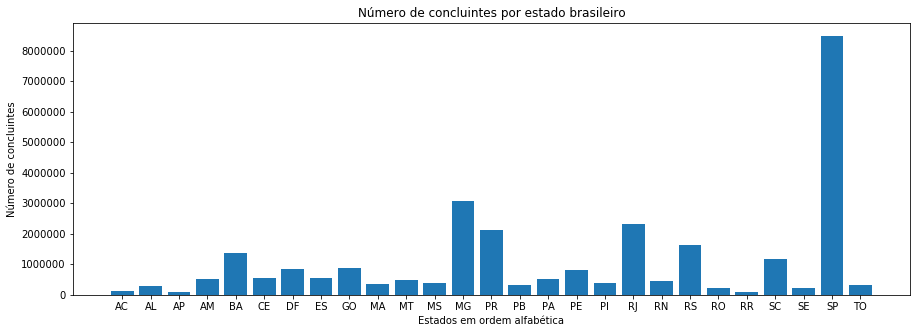

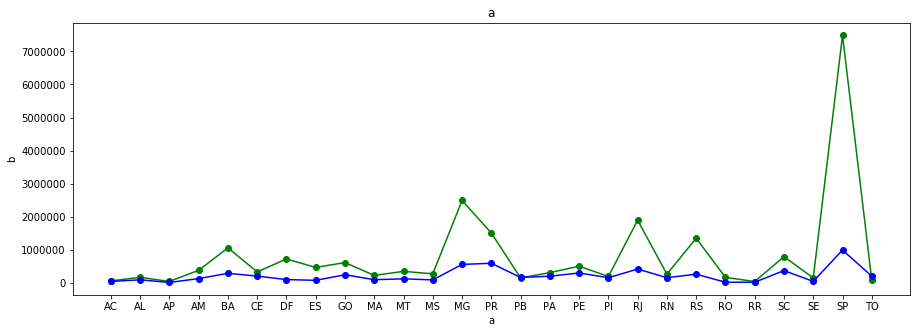

In [5]:
#Visualização dos dados gerados acima
generate_bar_graph("Número de concluintes por estado brasileiro", range(27), list(concluintes_total.values()), get_ufs(estados), "Estados em ordem alfabética", "Número de concluintes")
generate_many_line_graph("a", range(27), list(concluintes_privada_num.values()), list(concluintes_publica_num.values()), get_ufs(estados), "a", "b")

In [6]:
#plota_barra_linha("Relação de concluintes em escolas públicas x privadas", range(28), list(concluintes_publica_num.values()), list(concluintes_privada_num.values()), "Estados em ordem alfabética", "Número de concluintes")

In [7]:
anos = []
for c in concluintes:
    if(c['Ano Censo'] not in anos):
        anos.append(c['Ano Censo'])
anos.sort()

concluintes_por_ano = {}
ingressantes_por_ano = {}
vagas_por_ano = {}

for a in anos:
    concluintes_por_ano[a] = 0
    ingressantes_por_ano[a] = 0
    vagas_por_ano[a] = 0

for concluinte in concluintes:
    ano = concluinte['Ano Censo']
    concluintes_por_ano[ano] += concluinte['Número de Concluintes']

for ingressante in ingressantes:
    ano = ingressante['Ano Censo']
    ingressantes_por_ano[ano] += ingressante['Número de Ingressos']

for vaga in vagas:
    ano = vaga['Ano Censo']
    vagas_por_ano[ano] += float(vaga['Número de Vagas Oferecidas'].replace(",","."))


vagas_por_ano



{'2009': 5145973.0,
 '2010': 6440052.999999995,
 '2011': 4474330.999999996,
 '2012': 4672667.999999997,
 '2013': 5875380.999999998}

In [8]:
#generate_many_line_graph("Concluintes e ingressantes por ano", range(len(anos)), list(concluintes_por_ano.values()), list(ingressantes_por_ano.values()), "a", "b")

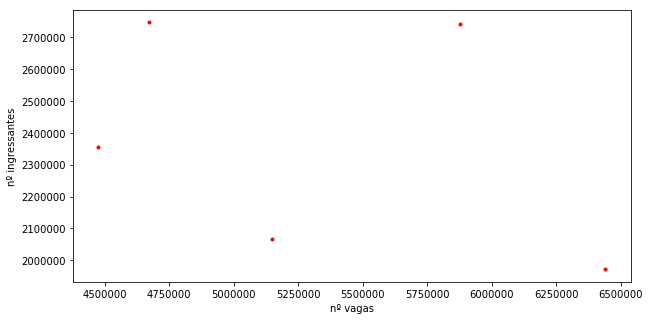

In [9]:
plota_grafico_dispersao("Número vagas x Número ingressantes", list(vagas_por_ano.values()), list(ingressantes_por_ano.values()), "nº vagas", "nº ingressantes")

In [10]:
vagas_por_ano

{'2009': 5145973.0,
 '2010': 6440052.999999995,
 '2011': 4474330.999999996,
 '2012': 4672667.999999997,
 '2013': 5875380.999999998}

In [11]:
ingressantes_por_ano

{'2009': 2065082,
 '2010': 1970978,
 '2011': 2355524,
 '2012': 2747089,
 '2013': 2742950}